In [97]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [98]:
Sales = pd.read_excel('Superstore.xls', index_col=0)

Sales.head()
# Sales.describe()


,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Row ID,,,,,,,,,,,,,,,,,,,,,
1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,5.81,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


In [122]:
# Map the amount of high-priority shipments within 2010 on a timeline.
date_n_priority = Sales[["Order Date", "Order Priority"]]
filtered_data = date_n_priority[(date_n_priority["Order Date"].dt.year == 2010) & (date_n_priority["Order Priority"] == "High")][["Order Date"]]


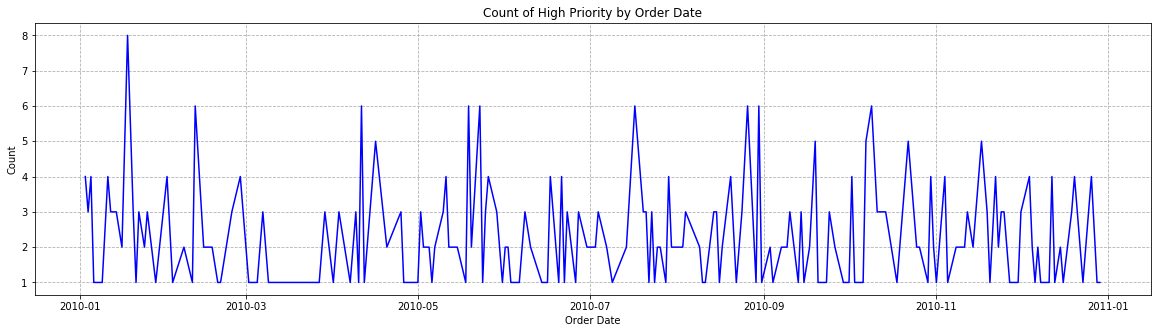

In [121]:
counted_date = filtered_data.groupby("Order Date")["Order Date"].count()
filtered_data.sort_values(by = ["Order Date"], inplace = True)

x = filtered_data["Order Date"].unique()
y = np.array(counted_date)

# fig, ax = plt.subplots()
# ax.plot(x, y, "b")
# ax.set(xlabel = "Order Date", ylabel = "Count", title = "Count of High Priority by Order Date")
# ax.grid(True, linestyle = "--")
plt.plot(x, y, "b")
plt.xlabel("Order Date")
plt.ylabel("Count")
plt.title("Count of High Priority by Order Date")
plt.grid(True, linestyle = "--")
# plt.figure(figsize=(50,10))
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()


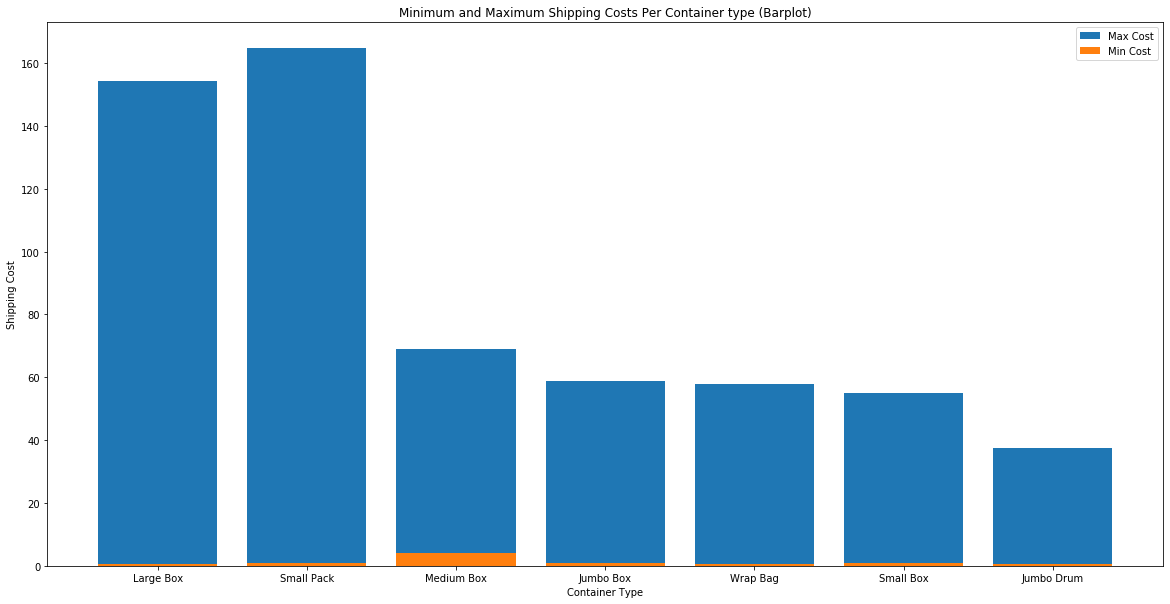

In [207]:
# Graph out the minimum and maximum shipping costs per container type.
sc_n_pc = Sales[["Shipping Cost", "Product Container"]]
max_cost = sc_n_pc.groupby("Product Container")["Shipping Cost"].max()
min_cost = sc_n_pc.groupby("Product Container")["Shipping Cost"].min()

x = sc_n_pc["Product Container"].unique()
# max_array = np.array(max_cost)
# min_array = np.array(min_cost)
# all_data = [max_array, min_array]
# plt.boxplot(all_data, vert = True, labels = x)

index = np.arange(len(x))
p1 = plt.bar(index, max_cost)
p2 = plt.bar(index, min_cost)
plt.xlabel("Container Type")
plt.xticks(index, x)
plt.ylabel("Shipping Cost")
plt.title("Minimum and Maximum Shipping Costs Per Container type (Barplot)")
plt.legend((p1[0], p2[0]), ["Max Cost", "Min Cost"])
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

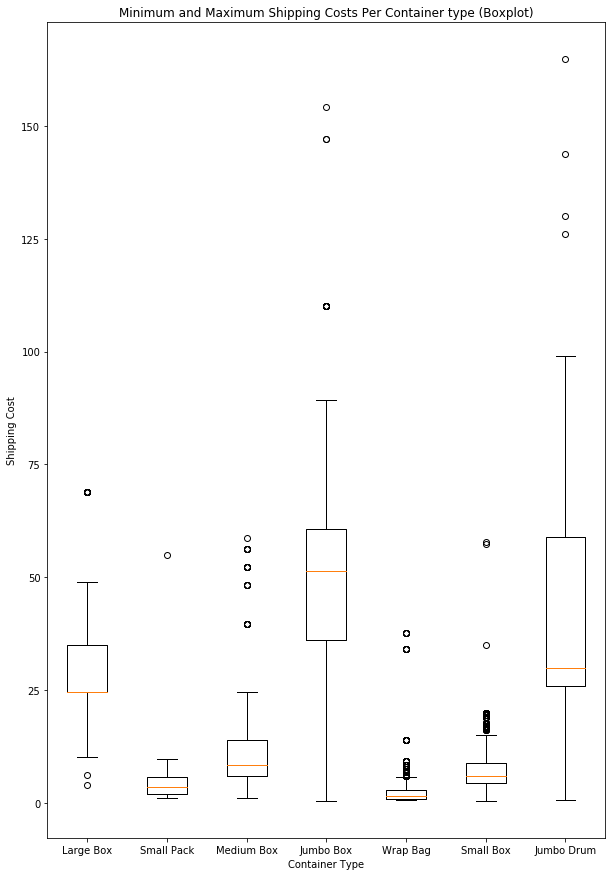

In [173]:
# Boxplot for part 2
L_box_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Large Box"][["Shipping Cost"]])
S_pack_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Small Pack"][["Shipping Cost"]])
M_box_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Medium Box"][["Shipping Cost"]])
J_box_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Jumbo Box"][["Shipping Cost"]])
W_bag_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Wrap Bag"][["Shipping Cost"]])
S_box_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Small Box"][["Shipping Cost"]])
J_drum_cost = np.array(sc_n_pc[sc_n_pc["Product Container"] == "Jumbo Drum"][["Shipping Cost"]])

all_data = [L_box_cost, S_pack_cost, M_box_cost, J_box_cost, W_bag_cost, S_box_cost, J_drum_cost]
plt.boxplot(all_data, vert = True, labels = x)
plt.xlabel("Container Type")
plt.ylabel("Shipping Cost")
plt.title("Minimum and Maximum Shipping Costs Per Container type (Boxplot)")
plt.rcParams['figure.figsize'] = [10, 15]
plt.show()

Region
Central    162819.1020
East       138124.0805
South      113316.6915
West       103761.5840
Name: Profit, dtype: float64
Region
Central    32442.474940
East       -5285.308659
South      41339.010000
West       48936.810000
Name: Profit, dtype: float64
Region
Central    286629.6664
East       185013.2725
South      267851.4101
West       146819.1663
Name: Profit, dtype: float64


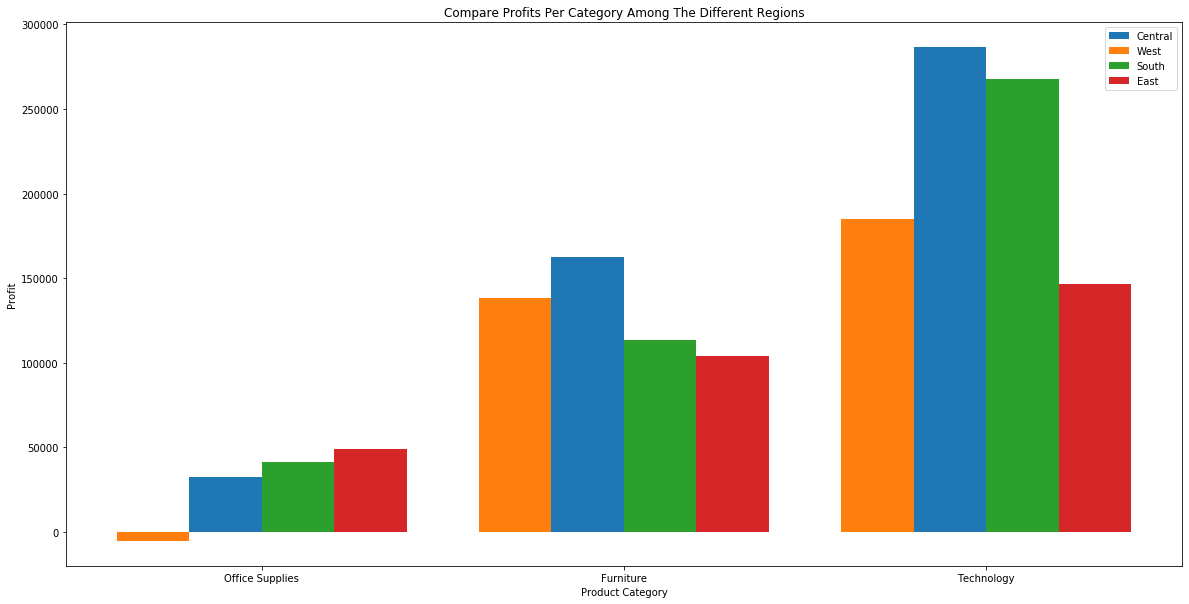

In [232]:
profit_cat_region = Sales[["Product Category", "Region", "Profit"]]
cat = profit_cat_region["Product Category"].unique()
region = profit_cat_region["Region"].unique()

def calculate_profit(region):
    return profit_cat_region[profit_cat_region["Region"] == region].groupby("Product Category")["Profit"].sum()

Central_profit = calculate_profit("Central")
East_profit = calculate_profit("East")
South_profit = calculate_profit("South")
West_profit = calculate_profit("West")

print(office_profit)
print(furniture_profit)
print(technology_profit)

index_cat = np.arange(len(cat))

width = 0.2

bar1 = plt.bar(index_cat - width, Central_profit, width)
bar2 = plt.bar(index_cat - width * 2, East_profit, width)
bar3 = plt.bar(index_cat, South_profit, width)
bar4 = plt.bar(index_cat + width, West_profit, width)

plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.title("Compare Profits Per Category Among The Different Regions")
plt.legend((bar1[0], bar2[0], bar3[0], bar4[0]), region)
plt.xticks(index_cat - width / 2, cat)
plt.show()


    